# 03 - Teste com a SqueezeNet1_1

Para esse segundo teste, será utilizado a VGG19 com a rede pré-treinada. Iremos fazer o `fine_tune` por 10 épocas.

## Impotação padrão do Kaggle

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Localização dos dados

In [2]:
root_path = '/kaggle/input/cassava-leaf-disease-classification/'

## Leitura do conjunto de treino em um `Dataframe`

In [3]:
df_train = pd.read_csv(root_path + 'train.csv')
df_train.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


## Importando o fastai

In [4]:
from fastai.vision.all import *

## Leitura dos dados e inicialização do modelo

In [5]:
dls = ImageDataLoaders.from_df(df_train, path=root_path+"train_images/", item_tfms=Resize(224))

In [6]:
learn = cnn_learner(dls, squeezenet1_1, metrics=[error_rate,accuracy], pretrained=True)

Downloading: "https://download.pytorch.org/models/squeezenet1_1-f364aa15.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_1-f364aa15.pth


## Fine tune por 10 épocas

In [7]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.164117,0.866725,0.288619,0.711381,04:18


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.849037,0.699670,0.250292,0.749708,03:49
1,0.726395,0.690141,0.239308,0.760692,03:42
2,0.628873,0.612719,0.228558,0.771442,03:45
3,0.590813,0.578594,0.206590,0.793410,03:43
4,0.553370,0.561517,0.195373,0.804627,03:40
5,0.542673,0.547144,0.197710,0.802290,03:40
6,0.477387,0.543172,0.198645,0.801355,03:42
7,0.444481,0.540344,0.192568,0.807432,03:41
8,0.390999,0.534605,0.186960,0.813040,03:46
9,0.387436,0.533639,0.187894,0.812106,03:53


## Matriz de Confusão do modelo

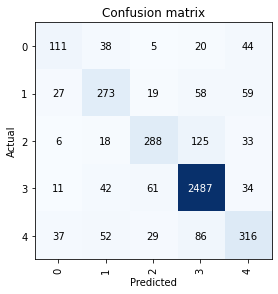

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## Salvando o modelo

In [9]:
nome_do_modelo = 'SqueezeNet_tune_10' 
learn.model_dir = "/kaggle/working"
learn.save(nome_do_modelo)

Path('/kaggle/working/SqueezeNet_tune_10.pth')